<a href="https://colab.research.google.com/github/zafor158/PRODIGY_ML-AI_TASK01/blob/main/House_price_prediction_using_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.#

**Data Set description**

Here's a brief version of what we'll find in the data description file.

**SalePrice** - the property's sale price in dollars. This is the target variable that we're trying to predict.

**MSSubClass**: The building class

**MSZoning**: The general zoning classification

**LotFrontage**: Linear feet of street connected to property

**LotArea**: Lot size in square feet

**Street**: Type of road access

**Alley**: Type of alley access

**LotShape**: General shape of property

**LandContour**: Flatness of the property

**Utilities**: Type of utilities available

**LotConfig**: Lot configuration

**LandSlope**: Slope of property

**Neighborhood**: Physical locations within Ames city limits

**Condition1**: Proximity to main road or railroad

**Condition2**: Proximity to main road or railroad (if a second is present)

**BldgType**: Type of dwelling

**HouseStyle**: Style of dwelling

**OverallQual**: Overall material and finish quality

**OverallCond**: Overall condition rating

**YearBuilt**: Original construction date

**YearRemodAdd**: Remodel date

**RoofStyle**: Type of roof

**RoofMatl**: Roof material


**Exterior2nd**: Exterior covering on house (if more than one
material)

**MasVnrType**: Masonry veneer type

**MasVnrArea**: Masonry veneer area in square feet

**ExterQual**: Exterior material quality

**ExterCond**: Present condition of the material on the exterior

**Foundation**: Type of foundation

**BsmtQual**: Height of the basement

**BsmtCond**: General condition of the basement

**BsmtExposure**: Walkout or garden level basement walls

**BsmtFinType1**: Quality of basement finished area

**BsmtFinSF1**: Type 1 finished square feet

**BsmtFinType2**: Quality of second finished area (if present)

**BsmtFinSF2**: Type 2 finished square feet

**BsmtUnfSF**: Unfinished square feet of basement area

**TotalBsmtSF**: Total square feet of basement area

**Heating**: Type of heating

**HeatingQC**: Heating quality and condition

**CentralAir**: Central air conditioning

**Electrical**: Electrical system

**1stFlrSF**: First Floor square feet

**2ndFlrSF**: Second floor square feet

**LowQualFinSF**: Low quality finished square feet (all floors)

**GrLivArea**: Above grade (ground) living area square feet

**BsmtFullBath**: Basement full bathrooms

**BsmtHalfBath**: Basement half bathrooms

**FullBath**: Full bathrooms above grade

**HalfBath**: Half baths above grade

**Bedroom**: Number of bedrooms above basement level

**Kitchen**: Number of kitchens

**KitchenQual**: Kitchen quality

**TotRmsAbvGrd**: Total rooms above grade (does not include bathrooms)

**Functional**: Home functionality rating

**Fireplaces**: Number of fireplaces

**FireplaceQu**: Fireplace quality

**GarageType**: Garage location

**GarageYrBlt**: Year garage was built

**GarageFinish**: Interior finish of the garage

**GarageCars**: Size of garage in car capacity

**GarageArea**: Size of garage in square feet

**GarageQual**: Garage quality

**GarageCond**: Garage condition

**PavedDrive**: Paved driveway

**WoodDeckSF**: Wood deck area in square feet

**OpenPorchSF**: Open porch area in square feet

**EnclosedPorch**: Enclosed porch area in square feet

**3SsnPorch**: Three season porch area in square feet

**ScreenPorch**: Screen porch area in square feet

**PoolArea**: Pool area in square feet

**Fence**: Fence quality

**MiscFeature**: Miscellaneous feature not covered in other categories

**MiscVal**: $Value of miscellaneous feature

**MoSold**: Month Sold

**YrSold**: Year Sold

**SaleType**: Type of sale

**SaleCondition**: Condition of sale



Based on the data description provided, the independent variables (features) we can use to predict house prices (SalePrice) based on square footage and the number of bedrooms and bathrooms could include:

**GrLivArea**: Above grade (ground) living area square feet

**TotalBsmtSF**: Total square feet of basement area

**BedroomAbvGr**: Number of bedrooms above basement level

**FullBath**: Number of full bathrooms above grade

**HalfBath**: Number of half bathrooms above grade

These variables are directly related to the size of the house (GrLivArea and TotalBsmtSF), the number of bedrooms (BedroomAbvGr), and the number of bathrooms (FullBath and HalfBath), which are commonly influential factors in determining house prices.

**Import Necessary Libraries**

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

**Read Data Set**

In [112]:
train= pd.read_csv('train.csv')
test= pd.read_csv('test.csv')

In [113]:
df=pd.read_csv('train.csv')

In [114]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [115]:
train.shape

(1460, 81)

In [116]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [117]:
train.duplicated().sum()

0

In [118]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [119]:
df = pd.read_csv('train.csv')
# Create a new DataFrame or modify an existing one
df_new = pd.DataFrame()
# Add the independent variables to the new DataFrame
df_new['GrLivArea'] = df['GrLivArea']
df_new['TotalBsmtSF'] = df['TotalBsmtSF']
df_new['BedroomAbvGr'] = df['BedroomAbvGr']
df_new['FullBath'] = df['FullBath']
df_new['HalfBath'] = df['HalfBath']

df_new['SalePrice'] = df['SalePrice']

print(df_new.head())


   GrLivArea  TotalBsmtSF  BedroomAbvGr  FullBath  HalfBath  SalePrice
0       1710          856             3         2         1     208500
1       1262         1262             3         2         0     181500
2       1786          920             3         2         1     223500
3       1717          756             3         1         0     140000
4       2198         1145             4         2         1     250000


In [120]:
df_new.shape

(1460, 6)

In [121]:
df_new.isnull().sum()

GrLivArea       0
TotalBsmtSF     0
BedroomAbvGr    0
FullBath        0
HalfBath        0
SalePrice       0
dtype: int64

In [122]:
features = ['GrLivArea', 'TotalBsmtSF', 'BedroomAbvGr', 'FullBath', 'HalfBath']
x=df_new[features]
y=df_new['SalePrice']

In [123]:
x

,GrLivArea,TotalBsmtSF,BedroomAbvGr,FullBath,HalfBath
0,1710,856,3,2,1
1,1262,1262,3,2,0
2,1786,920,3,2,1
3,1717,756,3,1,0
4,2198,1145,4,2,1
...,...,...,...,...,...
1455,1647,953,3,2,1
1456,2073,1542,3,2,0
1457,2340,1152,4,2,0
1458,1078,1078,2,1,0


In [124]:
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [164]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [170]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [171]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [172]:
rergression=LinearRegression()
regressor=rergression.fit(X_train,y_train)
mse=cross_val_score(rergression,X_train,y_train,scoring='neg_mean_squared_error',cv=10)

In [173]:
np.mean(mse)

-2390772759.5617657

In [174]:
reg_prediction=regressor.predict(X_test)
reg_prediction


array([123405.05522781, 299774.28121643, 136124.07426065, 191166.9803756 ,
       241692.37696846, 106333.67650414, 186118.83986731, 187409.59212689,
       106333.67650414, 149781.74014429, 170549.59741513,  99353.25428061,
       120692.01441363, 211857.50351849, 206933.37070125, 134792.0046932 ,
       204136.70071393, 143298.20426191, 135286.74119423, 204474.54732887,
       207845.34796467, 191368.44194965, 182063.22600858, 125886.74767453,
       200021.80613548, 189621.36023428, 188766.55073688, 116981.49065585,
       201319.63285499, 208545.03139896, 103980.33622617, 234868.17687149,
       350988.71848864, 127865.69367867, 224635.00340411, 132329.30156743,
       206191.73117228, 200095.51758466, 249257.10324365,  68862.67435634,
       116727.63369854, 236276.76714299, 109324.05426919, 294193.95830784,
       114024.05102904, 191172.25983661, 122918.3286683 , 109942.47489548,
       292845.43481068, 161817.47333052, 107631.01857772, 235137.11832972,
       112345.51348761, 3

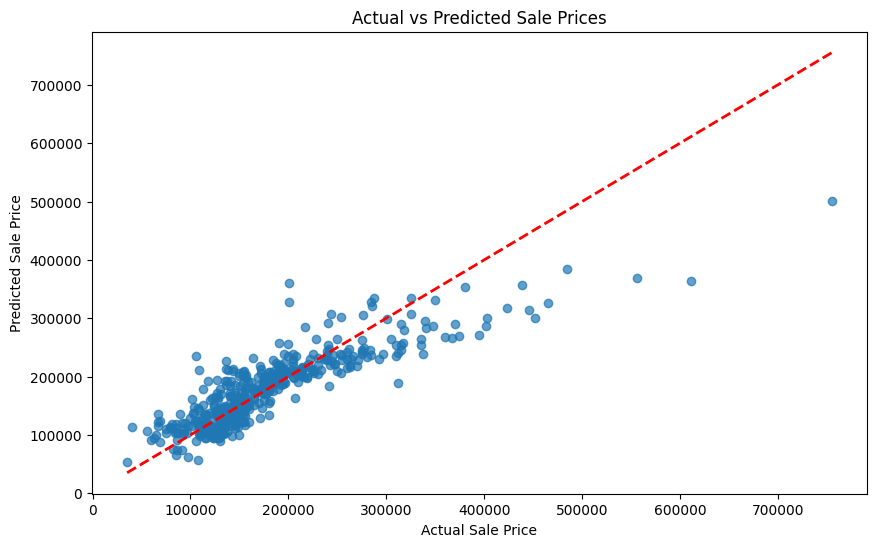

In [176]:
# Plotting Actual vs Predicted Sale Prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, prediction, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', linewidth=2)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Prices')
plt.show()

<ipython-input-178-6436c5d37296>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-prediction)


Text(0, 0.5, 'Residual Errors')

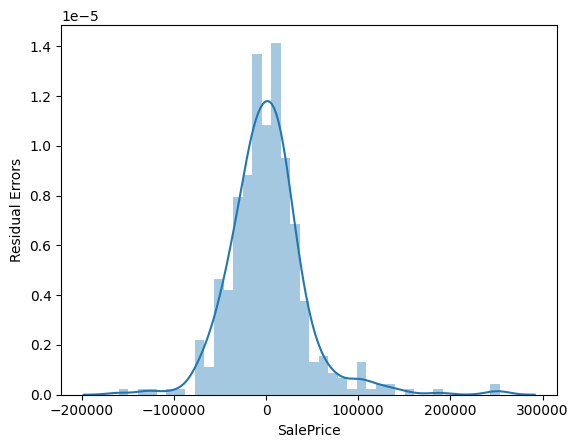

In [178]:
import seaborn as sns
sns.distplot(y_test-prediction)
plt.ylabel('Residual Errors')

In [179]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_prediction)
score

0.7270453489752479